# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Dataset

**Data Dictionary:**

* index - Unique Identifier for each row
* trans_date_trans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

In [3]:
train_data = pd.read_csv("raw_data/fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data = pd.read_csv("raw_data/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

From this all the columns are non-nulls

## Checking Categories

In [21]:
train_data["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [23]:
train_data[train_data["is_fraud"] == 1]["category"].value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [24]:
categories_fraudulent_index = train_data[train_data["is_fraud"] == 1]["category"].value_counts().index
categories_fraudulent_values = train_data[train_data["is_fraud"] == 1]["category"].value_counts().values

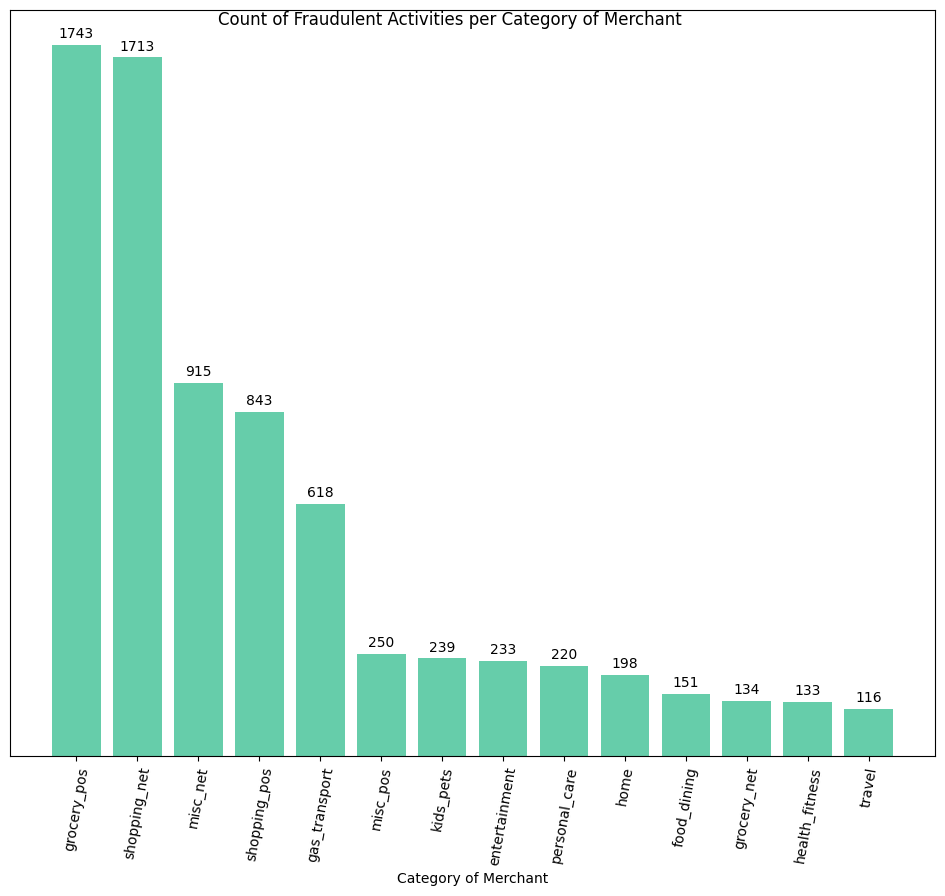

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=categories_fraudulent_index, height=categories_fraudulent_values, color = "mediumaquamarine")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        #fontweight="bold",
    )
plt.tight_layout()
fig.suptitle("Count of Fraudulent Activities per Category of Merchant")
plt.xlabel("Category of Merchant")
plt.xticks(rotation = 80)
plt.ylabel("")
plt.yticks([])
plt.show()

More fraudulent activities are done in grocery stores and internet shopping

In [ ]:
categories_fraudulent_values = train_data[train_data["is_fraud"] == 1]["category"].sum.values

In [55]:
amounts_lost = train_data[train_data["is_fraud"]==1].groupby("category").agg({"amt": lambda x: x.sum()}).sort_values(ascending=True, by="amt").reset_index()
amounts_lost

,category,amt
0,travel,1051.49
1,grocery_net,1629.82
2,health_fitness,2693.04
3,kids_pets,4331.08
4,personal_care,5757.52
5,gas_transport,7594.11
6,food_dining,18131.62
7,home,50971.66
8,misc_pos,54571.02
9,entertainment,117323.79


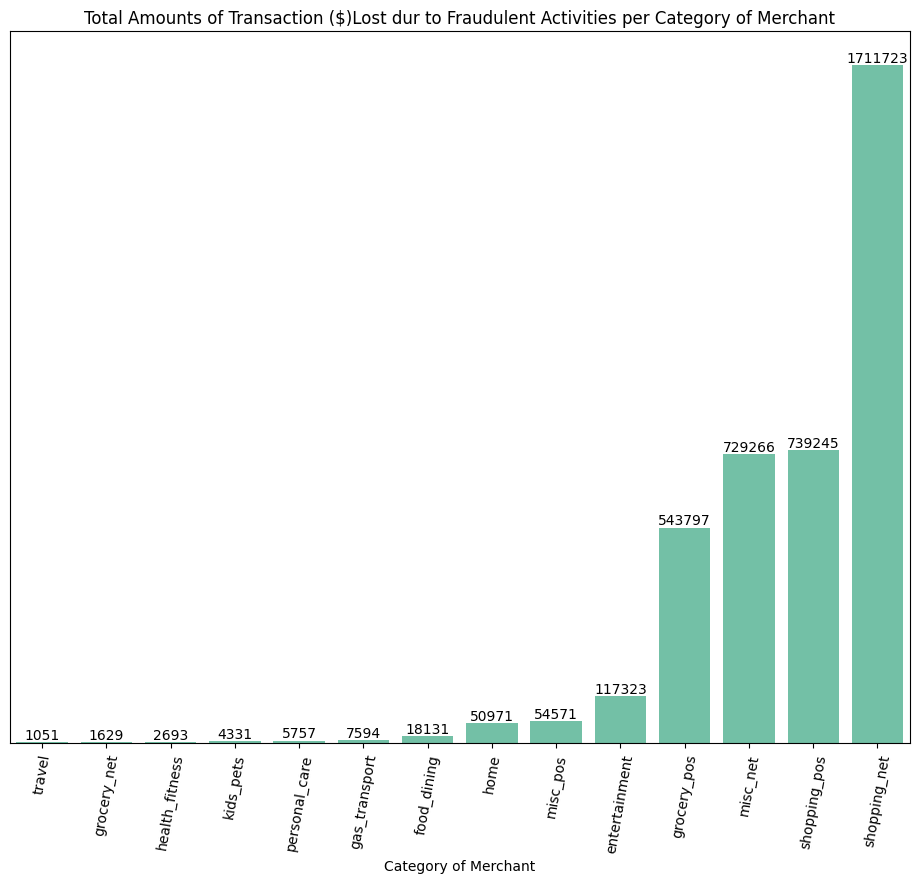

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=amounts_lost,
    x="category",
    y="amt",
    color="mediumaquamarine",
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        # fontweight="bold",
    )
plt.tight_layout()
plt.title("Total Amounts of Transaction ($)Lost dur to Fraudulent Activities per Category of Merchant")
plt.xlabel("Category of Merchant")
plt.xticks(rotation=80)
plt.ylabel("")
plt.yticks([])
plt.show()

* Most amount was lost shopping online.
* misc_net and shopping_pos have similar amounts lost due to fraudulent activities
* travel has the least amount lost to fraudulent activity

## Money Lost due to fraud

In [33]:
amount_per_is_fraud = train_data.groupby("is_fraud").agg(
    {"amt": lambda x: x.sum()}
).reset_index()

amount_per_is_fraud

,is_fraud,amt
0,0,87234340.29
1,1,3988088.61


In [47]:
fraud_amount = amount_per_is_fraud[amount_per_is_fraud["is_fraud"]==1]["amt"].values
non_fraud_amount = amount_per_is_fraud[amount_per_is_fraud["is_fraud"] == 0]["amt"].values
total_amount = fraud_amount + non_fraud_amount
fraud_amount, non_fraud_amount, total_amount

(array([3988088.61]), array([87234340.28999999]), array([91222428.89999999]))

In [49]:
100*fraud_amount/total_amount, 100*non_fraud_amount/total_amount

(array([4.37182901]), array([95.62817099]))

4.4% ($ 3 988 088.61)of the total amount was lost due to fraudulent activities

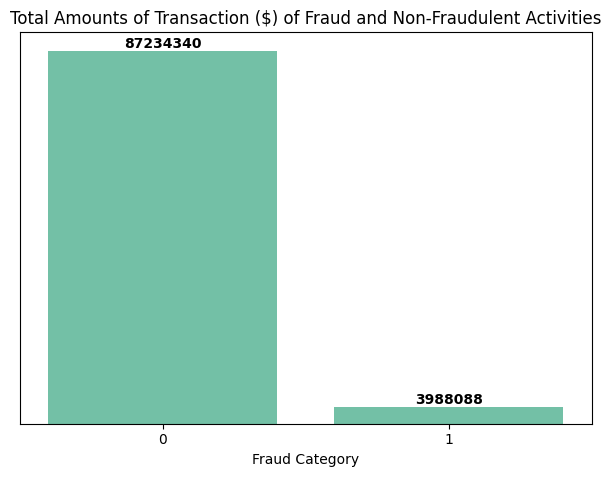

In [60]:
fig, ax = plt.subplots()
sns.barplot(data=amount_per_is_fraud, x = "is_fraud", y="amt", color="mediumaquamarine")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        fontweight="bold",
    )
plt.tight_layout()
plt.title("Total Amounts of Transaction ($) of Fraud and Non-Fraudulent Activities")
plt.xlabel("Fraud Category")
plt.ylabel("")
plt.yticks([])
plt.show()

## Check if the data is balanced

In [9]:
train_data["is_fraud"].value_counts(normalize=True)*100

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

This dataset is heavily imbalanced, with fraud cases (i.e. represented as 1) being about 0.579% and cases with not fraud (i.e. represented as 0) being 99.421%

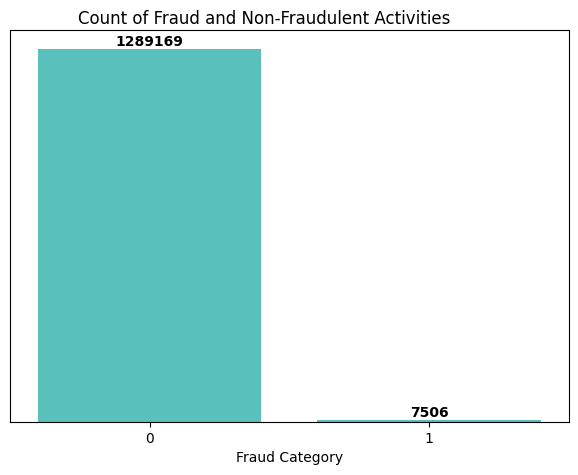

In [20]:
fig, ax = plt.subplots()
sns.countplot(data=train_data, x="is_fraud", color = "mediumturquoise")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        fontweight="bold",
    )
plt.tight_layout()
fig.suptitle("Count of Fraud and Non-Fraudulent Activities")
plt.xlabel("Fraud Category")
plt.ylabel("")
plt.yticks([])
plt.show()

## Seasonality in the data

In [64]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [69]:
x = train_data["trans_date_trans_time"].values
y = train_data["amt"].values

In [76]:
fraud_df = train_data[train_data["is_fraud"] == 1][["trans_date_trans_time","amt"]]
fraud_x = fraud_df["trans_date_trans_time"].values
fraud_y = fraud_df["amt"].values

In [77]:
non_fraud_df = train_data[train_data["is_fraud"] == 0][["trans_date_trans_time", "amt"]]
non_fraud_x = non_fraud_df["trans_date_trans_time"].values
non_fraud_y = non_fraud_df["amt"].values

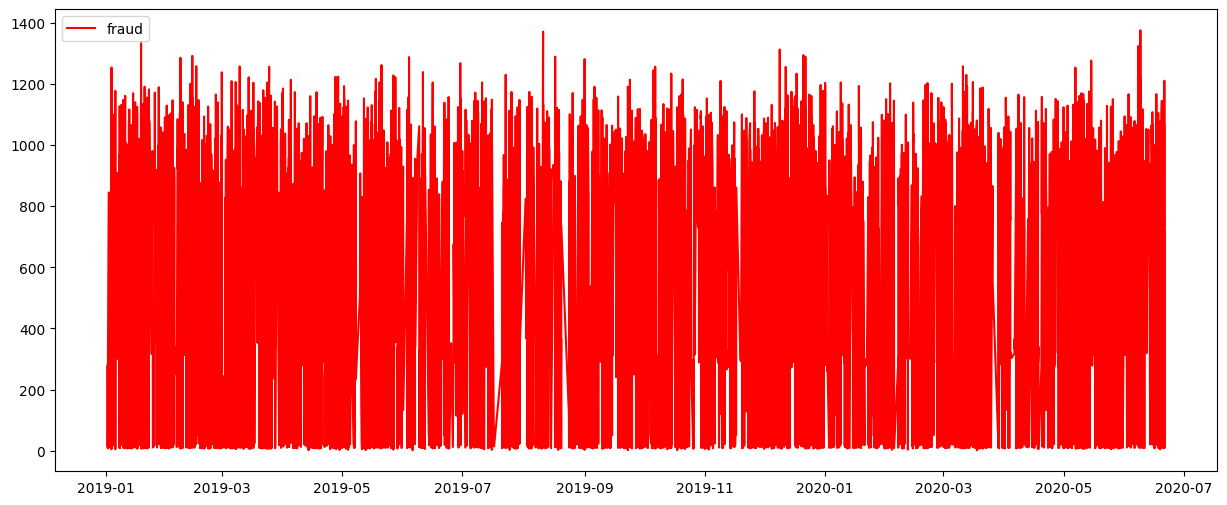

In [80]:
plt.figure(figsize=(15, 6))
plt.plot(fraud_x, fraud_y, color="red", label="fraud")
#plt.plot(non_fraud_x, non_fraud_y, color="green", label="non-fraud")
plt.legend()
plt.show()

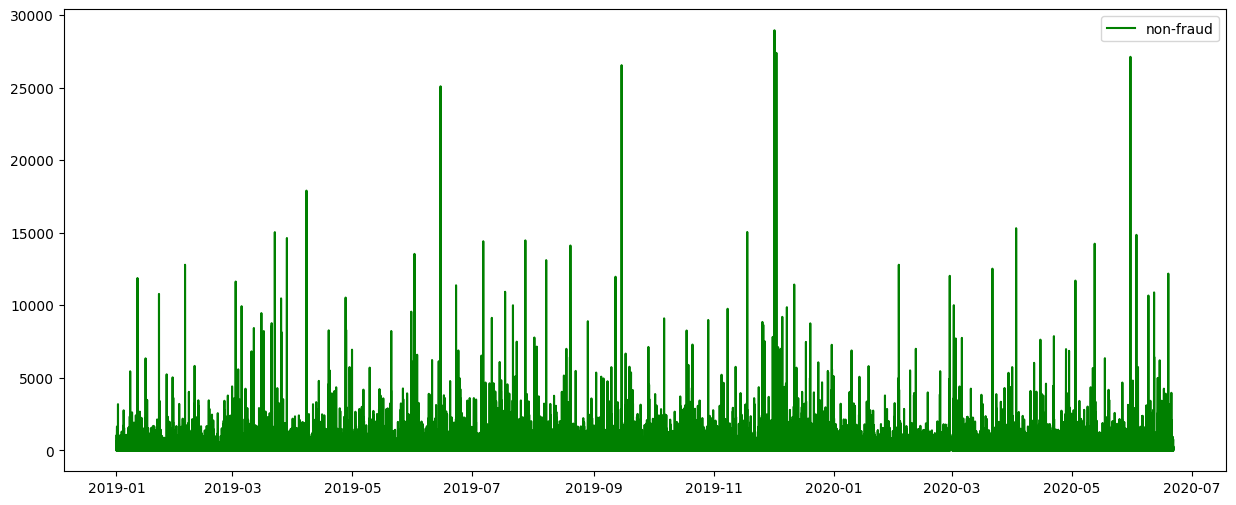

In [79]:
plt.figure(figsize=(15, 6))
#plt.plot(fraud_x, fraud_y, color="red", label="fraud")
plt.plot(non_fraud_x, non_fraud_y, color="green", label="non-fraud")
plt.legend()
plt.show()

* Not much conclusion can be drawn here besides that the fraudulent activities happened across the entire period of the dataset

**Add Month, Day and Year to the Fraud Dataframe**

In [100]:
fraud_df["month"] = fraud_df["trans_date_trans_time"].dt.month
fraud_df["day"] = fraud_df["trans_date_trans_time"].dt.day
fraud_df["year"] = fraud_df["trans_date_trans_time"].dt.year
fraud_df["day_of_week"] = fraud_df["trans_date_trans_time"].dt.day_name()

In [85]:
fraud_df

,trans_date_trans_time,amt,month,day,year
2449,2019-01-02 01:06:37,281.06,1,2,2019
2472,2019-01-02 01:47:29,11.52,1,2,2019
2523,2019-01-02 03:05:23,276.31,1,2,2019
2546,2019-01-02 03:38:03,7.03,1,2,2019
2553,2019-01-02 03:55:47,275.73,1,2,2019
...,...,...,...,...,...
1295399,2020-06-21 01:00:08,977.01,6,21,2020
1295491,2020-06-21 01:53:35,1210.91,6,21,2020
1295532,2020-06-21 02:16:56,10.24,6,21,2020
1295666,2020-06-21 03:26:20,21.69,6,21,2020


In [88]:
fraud_amount_per_month = fraud_df.groupby("month").agg({"amt": lambda x:x.sum()}).reset_index()
fraud_amount_per_month

,month,amt
0,1,444375.74
1,2,458001.19
2,3,471727.69
3,4,354241.27
4,5,497775.49
5,6,358434.41
6,7,188701.59
7,8,203951.13
8,9,217675.37
9,10,257739.72


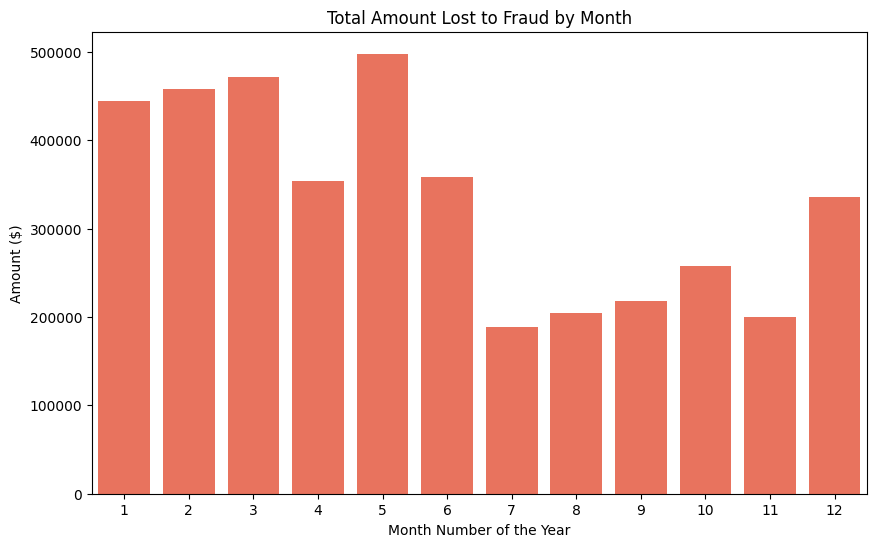

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(data=fraud_amount_per_month, x="month", y="amt", color = "tomato")
plt.xlabel("Month Number of the Year")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Month")
plt.show()

* Most Fraud amount was lost in first half of the year compare to the second half

In [97]:
fraud_amount_per_day = fraud_df.groupby("day").agg({"amt": lambda x: x.sum()}).reset_index()
fraud_amount_per_day.sort_values(by="amt")

,day,amt
5,6,80580.37
4,5,89146.16
8,9,95770.67
26,27,101177.84
23,24,102114.67
30,31,104312.53
0,1,106810.24
25,26,108158.21
17,18,110460.95
21,22,110711.12


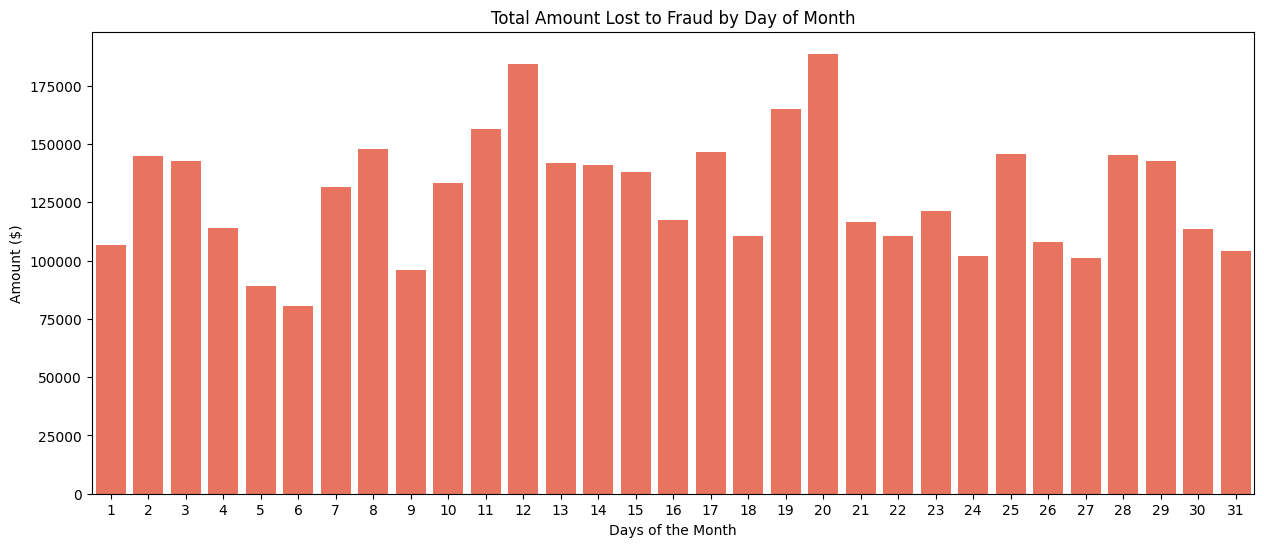

In [96]:
plt.figure(figsize=(15, 6))
sns.barplot(data=fraud_amount_per_day, x="day", y="amt", color="tomato")
plt.xlabel("Days of the Month")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Day of Month")
plt.show()

* There are periods of increase followed by periods of decrease and then a repeat
* The 5 and 6 days of the month have the least number of fraudulent amounts.
* 12th and 20th are the days to refrain from shopping as there most number of frauds amounts then

In [102]:
fraud_amount_per_day_of_week = fraud_df.groupby("day_of_week").agg({"amt": lambda x: x.sum()}).reset_index()
fraud_amount_per_day_of_week.sort_values(by="amt")

,day_of_week,amt
6,Wednesday,449581.26
5,Tuesday,501650.80
4,Thursday,544490.00
0,Friday,581816.53
1,Monday,610146.66
2,Saturday,636539.35
3,Sunday,663864.01


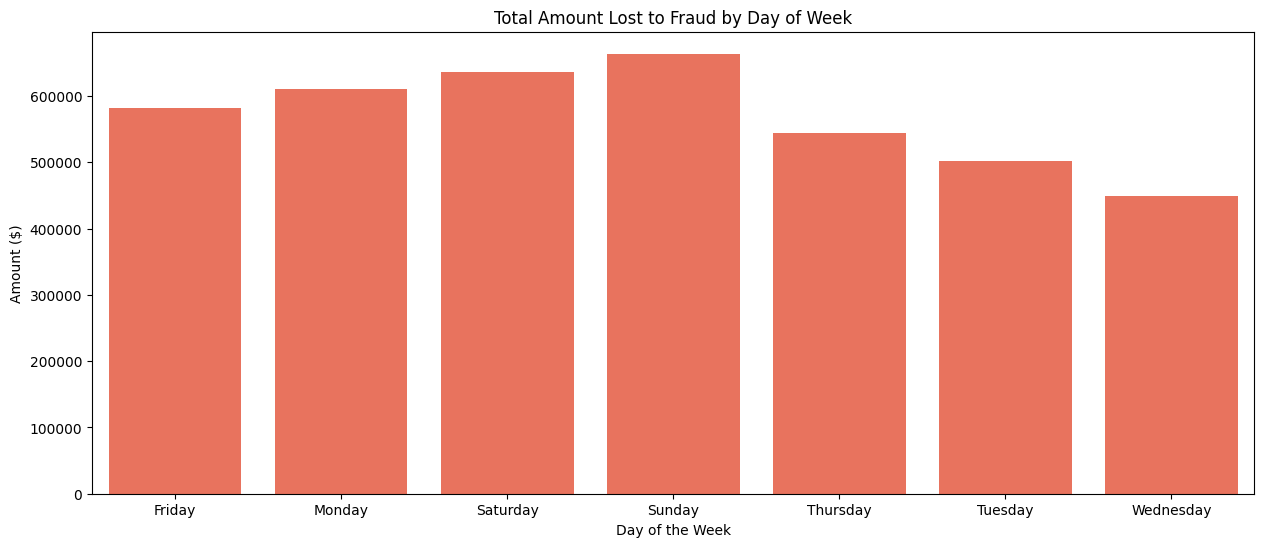

In [103]:
plt.figure(figsize=(15, 6))
sns.barplot(data=fraud_amount_per_day_of_week, x="day_of_week", y="amt", color="tomato")
plt.xlabel("Day of the Week")
plt.ylabel("Amount ($)")
plt.title("Total Amount Lost to Fraud by Day of Week")
plt.show()

* Sunday is the day with most amount lost to fraudulent activity
* Friday, Saturday, Sunday and Monday are the days where the fraudulent activities are high

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966